In [10]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('allgames_stats.csv')

In [12]:
df.head()

,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
0,1,1996-11-03,LAL,NaN,MIN,W,0,6:00,0.0,1.0,...,1,0,0.0,1.0,1,1,0.0,-1.1,Kobe Bryant,Regular Season
1,2,1996-11-05,LAL,@,NYK,W,0,3:00,0.0,1.0,...,0,0,0.0,0.0,1,0,1.0,-1.1,Kobe Bryant,Regular Season
2,3,1996-11-06,LAL,@,CHH,L,0,7:00,2.0,3.0,...,0,0,0.0,0.0,3,0,5.0,0.7,Kobe Bryant,Regular Season
3,4,1996-11-08,LAL,@,TOR,L,0,17:00,3.0,8.0,...,3,0,0.0,1.0,0,3,10.0,5.2,Kobe Bryant,Regular Season
4,5,1996-11-10,LAL,NaN,ATL,W,0,8:00,0.0,3.0,...,3,1,0.0,0.0,0,0,2.0,1.9,Kobe Bryant,Regular Season


In [13]:
df.corr()

,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
G,1.000000,0.031844,0.037406,0.015912,0.033710,0.026629,0.028320,-0.005683,0.004134,0.001567,...,-0.000332,0.000533,-0.001519,0.035163,0.015925,-0.046922,-0.025528,-0.070267,0.034846,0.055031
GS,0.031844,1.000000,0.343936,0.388289,0.125942,0.082089,0.126060,0.000336,0.170412,0.180758,...,0.092060,0.266052,0.271344,0.273588,0.139481,0.064720,0.160902,0.064334,0.350129,0.324533
FG,0.037406,0.343936,1.000000,0.805049,0.579731,0.241133,0.154314,0.191326,0.246565,0.256149,...,0.175407,0.168081,0.218346,0.054412,0.206974,0.111389,0.053832,0.117806,0.913920,0.784425
FGA,0.015912,0.388289,0.805049,1.000000,0.046039,0.181355,0.258195,0.018145,0.302132,0.304701,...,0.258631,0.160055,0.245308,0.018026,0.187786,0.095243,0.046972,0.163940,0.775241,0.496011
FG%,0.033710,0.125942,0.579731,0.046039,1.000000,0.167678,-0.063349,0.320451,0.030230,0.043302,...,-0.034968,0.094708,0.067934,0.096044,0.105191,0.057549,0.052542,-0.009305,0.487926,0.615850
3P,0.026629,0.082089,0.241133,0.181355,0.167678,1.000000,0.787468,0.654010,-0.002484,0.022897,...,-0.055598,0.092017,0.058316,0.027814,-0.041208,-0.055079,0.053665,-0.024851,0.327535,0.310548
3PA,0.028320,0.126060,0.154314,0.258195,-0.063349,0.787468,1.000000,0.202685,0.030108,0.064786,...,-0.049485,0.133282,0.097754,0.057825,-0.072253,-0.077684,0.093083,-0.023581,0.243067,0.165615
3P%,-0.005683,0.000336,0.191326,0.018145,0.320451,0.654010,0.202685,1.000000,-0.034271,-0.026016,...,-0.027410,0.027183,0.012953,-0.011403,-0.000878,-0.012635,0.008050,-0.015219,0.231114,0.269230
FT,0.004134,0.170412,0.246565,0.302132,0.030230,-0.002484,0.030108,-0.034271,1.000000,0.949245,...,0.129044,0.090116,0.131736,0.032703,0.123769,0.095474,0.073715,0.159892,0.587163,0.513579
FTA,0.001567,0.180758,0.256149,0.304701,0.043302,0.022897,0.064786,-0.026016,0.949245,1.000000,...,0.140087,0.135309,0.176030,0.066962,0.112947,0.104603,0.099381,0.145158,0.577730,0.494320


In [14]:
a=df.loc[(df['Tm']=='LAL')&(df['Opp']=='UTA')&(df['Player']=='Kobe Bryant')]
                        

In [15]:
a.head(15)

,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
10,11,1996-11-20,LAL,NaN,UTA,L,0,21:00,4.0,5.0,...,1,1,0.0,1.0,2,1,11.0,8.4,Kobe Bryant,Regular Season
15,16,1996-12-04,LAL,@,UTA,L,0,13:00,2.0,6.0,...,3,2,0.0,0.0,1,1,8.0,5.1,Kobe Bryant,Regular Season
65,66,1997-04-09,LAL,@,UTA,L,0,34:00,3.0,12.0,...,2,3,1.0,0.0,2,2,11.0,4.3,Kobe Bryant,Regular Season
67,68,1997-04-13,LAL,NaN,UTA,W,0,16:00,3.0,5.0,...,1,4,0.0,1.0,1,0,12.0,12.9,Kobe Bryant,Regular Season
71,1,1997-10-31,LAL,NaN,UTA,W,0,33:00,5.0,13.0,...,3,5,1.0,0.0,1,1,23.0,19.5,Kobe Bryant,Regular Season
76,6,1997-11-18,LAL,@,UTA,W,0,29:00,4.0,10.0,...,5,2,0.0,2.0,2,2,19.0,15.1,Kobe Bryant,Regular Season
137,67,1998-03-28,LAL,@,UTA,L,0,27:00,0.0,4.0,...,0,3,4.0,1.0,2,1,2.0,3.6,Kobe Bryant,Regular Season
149,79,1998-04-19,LAL,NaN,UTA,W,0,37:00,10.0,19.0,...,2,3,2.0,2.0,2,1,25.0,19.0,Kobe Bryant,Regular Season
151,2,1999-02-07,LAL,NaN,UTA,L,1,41:00,7.0,12.0,...,12,3,0.0,2.0,5,6,16.0,10.9,Kobe Bryant,Regular Season
168,19,1999-03-07,LAL,@,UTA,W,1,38:00,7.0,16.0,...,4,1,0.0,1.0,5,5,24.0,10.8,Kobe Bryant,Regular Season


In [16]:
a.corr()

,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
G,1.000000,0.083891,-0.035025,0.096739,-0.235424,0.102207,0.161331,-0.034763,-0.102366,-0.075466,...,0.207042,-0.239827,-0.150734,-0.007356,0.145185,-0.074948,-0.102790,-0.180160,-0.054515,-0.087613
GS,0.083891,1.000000,0.564557,0.601415,0.032679,0.226484,0.215355,0.204065,0.332572,0.341648,...,0.140270,0.496402,0.514006,0.412587,0.269708,-0.093027,0.311688,0.231149,0.587045,0.530652
FG,-0.035025,0.564557,1.000000,0.834989,0.358371,0.458629,0.428350,0.356477,0.282743,0.317487,...,-0.027557,0.425355,0.387966,0.241068,0.213775,0.104856,0.222677,0.150508,0.919650,0.840216
FGA,0.096739,0.601415,0.834989,1.000000,-0.093182,0.429502,0.621313,0.202642,0.357530,0.378887,...,0.239903,0.389012,0.448969,0.164788,0.214780,-0.016014,0.130783,0.180616,0.825138,0.615351
FG%,-0.235424,0.032679,0.358371,-0.093182,1.000000,0.097300,-0.205699,0.363046,-0.071841,-0.051777,...,-0.339390,0.149156,0.018944,0.135380,-0.005590,0.175674,0.184599,0.014529,0.247862,0.395999
3P,0.102207,0.226484,0.458629,0.429502,0.097300,1.000000,0.750307,0.688139,-0.059052,-0.013787,...,-0.120609,-0.022501,-0.063875,-0.131809,0.102970,-0.170016,-0.001041,-0.034487,0.452140,0.338979
3PA,0.161331,0.215355,0.428350,0.621313,-0.205699,0.750307,1.000000,0.191503,-0.004167,0.036372,...,0.064447,-0.020639,0.003588,-0.076856,0.100824,-0.222674,-0.096447,-0.073812,0.418193,0.224079
3P%,-0.034763,0.204065,0.356477,0.202642,0.363046,0.688139,0.191503,1.000000,0.026264,0.043392,...,-0.183149,0.121145,0.045137,-0.139526,0.035317,-0.034724,0.016852,0.016498,0.379939,0.361216
FT,-0.102366,0.332572,0.282743,0.357530,-0.071841,-0.059052,-0.004167,0.026264,1.000000,0.977919,...,0.159449,0.267303,0.306585,0.143578,0.101969,-0.022793,0.138619,0.232445,0.618739,0.589298
FTA,-0.075466,0.341648,0.317487,0.378887,-0.051777,-0.013787,0.036372,0.043392,0.977919,1.000000,...,0.197629,0.266916,0.319782,0.166546,0.076163,-0.035030,0.100636,0.229160,0.641406,0.610560


In [ ]:
#探究詹姆斯骑士的前79场 热火的前79场 湖人的前55场数据 通过树状图来看他的助攻能力

In [4]:
lbjcle=df.loc[(df['Tm']=='CLE')&(df['Player']=='Lebron James')] #the statistics of LBJ in CLE
lbjmia=df.loc[(df['Tm']=='MIA')&(df['Player']=='Lebron James')] #the statistics of LBJ in MIA
lbjlal=df.loc[(df['Tm']=='LAL')&(df['Player']=='Lebron James')] #the statistics of LBJ in LAL

In [5]:
rookie=lbjcle.iloc[:79,:]  
big3=lbjmia.head(79)
now=lbjlal.iloc[-55:,:]

In [6]:
rookie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 1566 to 1644
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       79 non-null     int64  
 1   Date    79 non-null     object 
 2   Tm      79 non-null     object 
 3   X       41 non-null     object 
 4   Opp     79 non-null     object 
 5   Result  79 non-null     object 
 6   GS      79 non-null     int64  
 7   MP      79 non-null     object 
 8   FG      79 non-null     float64
 9   FGA     79 non-null     float64
 10  FG%     79 non-null     float64
 11  3P      79 non-null     int64  
 12  3PA     79 non-null     int64  
 13  3P%     69 non-null     float64
 14  FT      79 non-null     float64
 15  FTA     79 non-null     float64
 16  FT%     75 non-null     float64
 17  ORB     79 non-null     float64
 18  DRB     79 non-null     float64
 19  TRB     79 non-null     int64  
 20  AST     79 non-null     int64  
 21  STL     79 non-null     float64
 22 

In [ ]:
#通过MP和PTS来判断詹姆斯在不同时期的得分效率

<AxesSubplot:xlabel='MP', ylabel='PTS'>

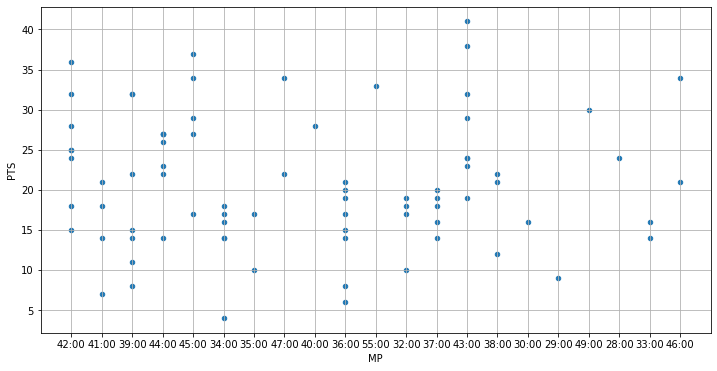

In [7]:
rookie.plot(kind='scatter',x='MP',y='PTS',figsize=(12,6),grid=True)

<AxesSubplot:>

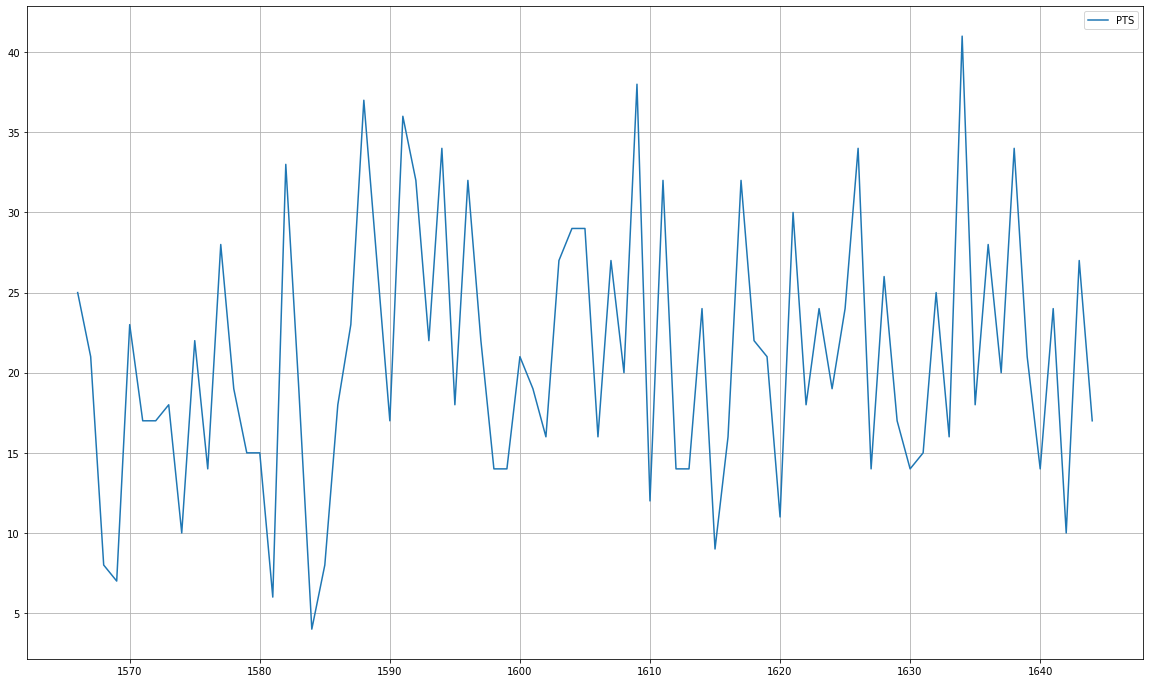

In [8]:
X = rookie.loc[rookie['Tm']=='CLE',['MP','PTS']]
X.plot(kind='line', figsize=(20, 12), legend=True, grid=True)


In [ ]:
#判断詹姆斯在不同时期的助攻能力

Text(0.5, 0, 'AST')

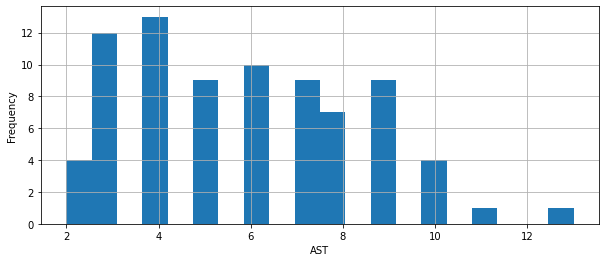

In [44]:
astlbjrookie =rookie['AST'].plot(kind='hist',bins=20,figsize=(10,4),grid=True)
astlbjrookie.set_xlabel('AST')


Text(0.5, 0, 'AST')

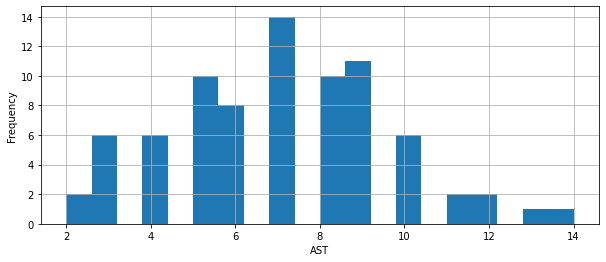

In [9]:
astlbjbig3 = big3['AST'].plot(kind='hist',bins=20,figsize=(10,4),grid=True)
astlbjbig3.set_xlabel('AST')

Text(0.5, 0, 'AST')

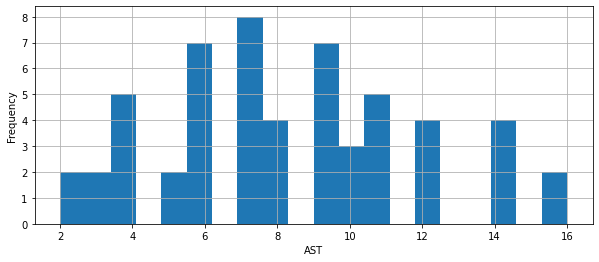

In [10]:
astlbjnow = now['AST'].plot(kind='hist',bins=20,figsize=(10,4),grid=True)  #hypothesis test
astlbjnow.set_xlabel('AST')

Text(0.5, 0, 'PTS')

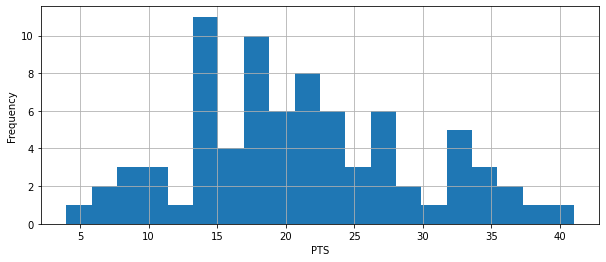

In [11]:
ptslbjrookie = rookie['PTS'].plot(kind='hist',bins=20,figsize=(10,4),grid=True) #柱状图 bins: 统计的区间分布
ptslbjrookie.set_xlabel('PTS')

Text(0.5, 0, 'PTS')

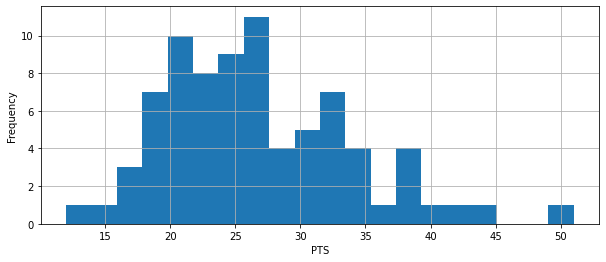

In [12]:
ptslbjbig3 = big3['PTS'].plot(kind='hist',bins=20,figsize=(10,4),grid=True) #柱状图 bins: 统计的区间分布
ptslbjbig3.set_xlabel('PTS')

Text(0.5, 0, 'PTS')

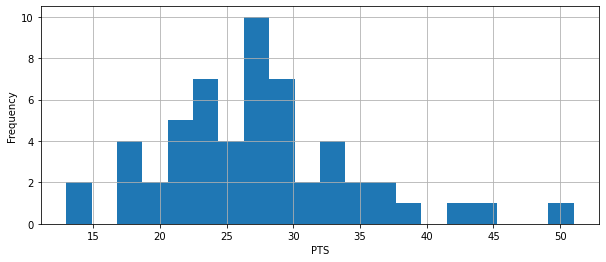

In [13]:
ptslbjnow = now['PTS'].plot(kind='hist',bins=20,figsize=(10,4),grid=True)
ptslbjnow.set_xlabel('PTS')

In [14]:
 #get the data for each player  以列为单位进行选取 column
lebron = df.loc[df['Player'] == 'Lebron James']
jordan= df.loc[df['Player'] == 'Michael Jordan']
kobe= df.loc[df['Player'] == 'Kobe Bryant']

In [15]:
lebron

,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
1566,1,2003-10-29,CLE,@,SAC,L,1,42:00,12.0,20.0,...,6,9,4.0,0.0,2,3,25.0,24.7,Lebron James,Regular Season
1567,2,2003-10-30,CLE,@,PHO,L,1,41:00,8.0,17.0,...,12,8,1.0,0.0,7,1,21.0,14.7,Lebron James,Regular Season
1568,3,2003-11-01,CLE,@,POR,L,1,39:00,3.0,12.0,...,4,6,2.0,0.0,2,3,8.0,5.0,Lebron James,Regular Season
1569,4,2003-11-05,CLE,NaN,DEN,L,1,41:00,3.0,11.0,...,11,7,2.0,3.0,2,1,7.0,11.2,Lebron James,Regular Season
1570,5,2003-11-07,CLE,@,IND,L,1,44:00,8.0,18.0,...,5,3,0.0,0.0,7,2,23.0,9.0,Lebron James,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,18,2018-05-27,CLE,@,BOS,W,1,48:00,12.0,24.0,...,15,9,0.0,2.0,8,4,35.0,24.4,Lebron James,Playoffs
2999,19,2018-05-31,CLE,@,GSW,L,1,47:32,19.0,32.0,...,8,8,1.0,1.0,5,2,51.0,NaN,Lebron James,Playoffs
3000,20,2018-06-03,CLE,@,GSW,L,1,43:51,10.0,20.0,...,9,13,2.0,0.0,5,2,29.0,26.6,Lebron James,Playoffs
3001,21,2018-06-06,CLE,NaN,GSW,L,1,46:52,13.0,28.0,...,10,11,2.0,2.0,4,2,33.0,28.7,Lebron James,Playoffs


In [16]:
print(f"lebron Minscore: {lebron['PTS'].min()} Maxscore: {lebron['PTS'].max()} nAvgscore: {round(lebron['PTS'].mean())}")  #返回一个数值 which is calculated

lebron Minscore: 3.0 Maxscore: 61.0 nAvgscore: 27


/opt/anaconda3/envs/Python3-7_Keras_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/Python3-7_Keras_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jordan score each year')

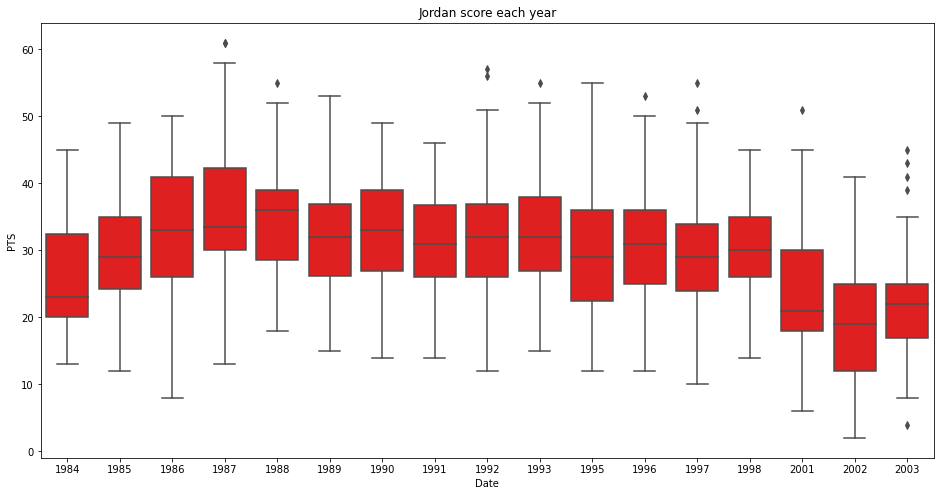

In [17]:
fig= plt.subplots(figsize=(16,8))  #用来创建总画布/figure窗口的
jordan['Date'] = pd.to_datetime(jordan['Date'])  #将DataFrame中的日期格式转换为object格式
sns.boxplot(jordan['Date'].dt.year, jordan['PTS'], color='red').set_title('Jordan score each year') #seaborn
                                                                                       #identify the outliers 


/opt/anaconda3/envs/Python3-7_Keras_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/Python3-7_Keras_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'kobe score each year')

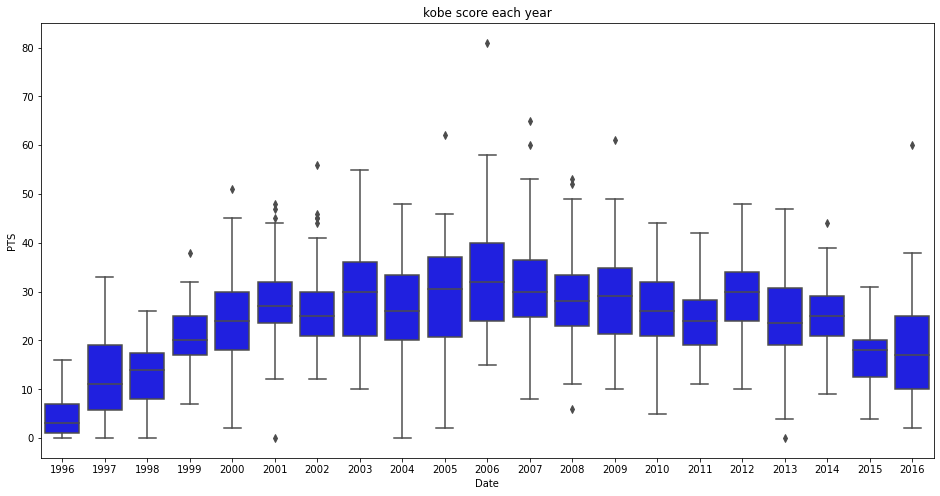

In [18]:
fig= plt.subplots(figsize=(16,8))  #用来创建总画布/figure窗口的
kobe['Date'] = pd.to_datetime(kobe['Date'])  #将DataFrame中的日期格式转换为object格式
sns.boxplot(kobe['Date'].dt.year, kobe['PTS'], color='blue').set_title('kobe score each year')

/opt/anaconda3/envs/Python3-7_Keras_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/Python3-7_Keras_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'lebron score each year')

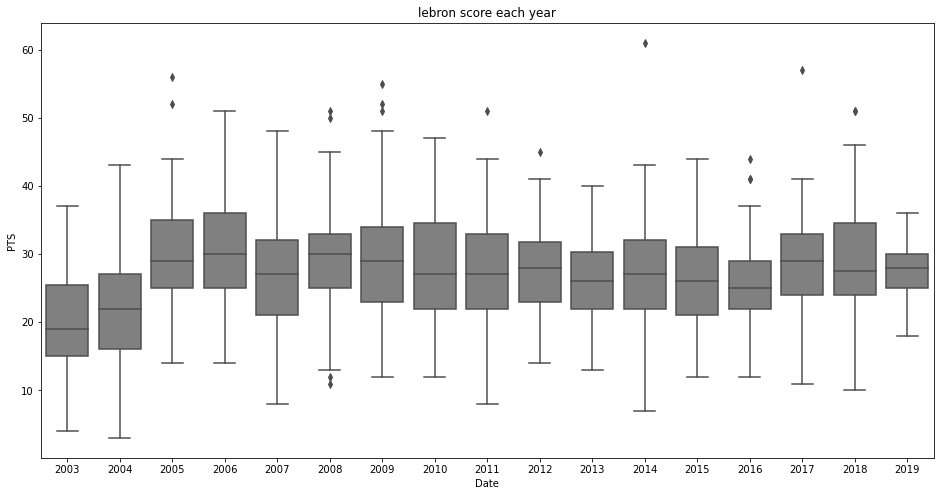

In [19]:
fig= plt.subplots(figsize=(16,8))  #用来创建总画布/figure窗口的
lebron['Date'] = pd.to_datetime(lebron['Date'])  #将DataFrame中的日期格式转换为object格式
sns.boxplot(lebron['Date'].dt.year, lebron['PTS'], color='grey').set_title('lebron score each year')

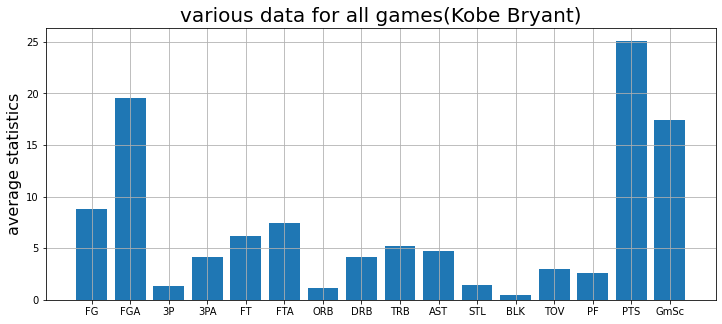

In [20]:
labels = ["FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "GmSc"]
kobeMeans = np.array([kobe[i].mean() for i in labels])     #统计kobe的所有平均数据
kobe_avg_stats = {
    labels[0]:kobeMeans[0],
    labels[1]:kobeMeans[1],
    labels[2]:kobeMeans[2],
    labels[3]:kobeMeans[3],
    labels[4]:kobeMeans[4],
    labels[5]:kobeMeans[5],
    labels[6]:kobeMeans[6],
    labels[7]:kobeMeans[7],
    labels[8]:kobeMeans[8],
    labels[9]:kobeMeans[9],
    labels[10]:kobeMeans[10],
    labels[11]:kobeMeans[11],
    labels[12]:kobeMeans[12],
    labels[13]:kobeMeans[13],
    labels[14]:kobeMeans[14],
    labels[15]:kobeMeans[15],
    }


fig = plt.figure(figsize=(12,5))
plt.bar(kobe_avg_stats.keys(),kobe_avg_stats.values())
plt.ylabel('average statistics',fontsize=16)
plt.title('various data for all games(Kobe Bryant)',fontsize=20)
plt.grid()

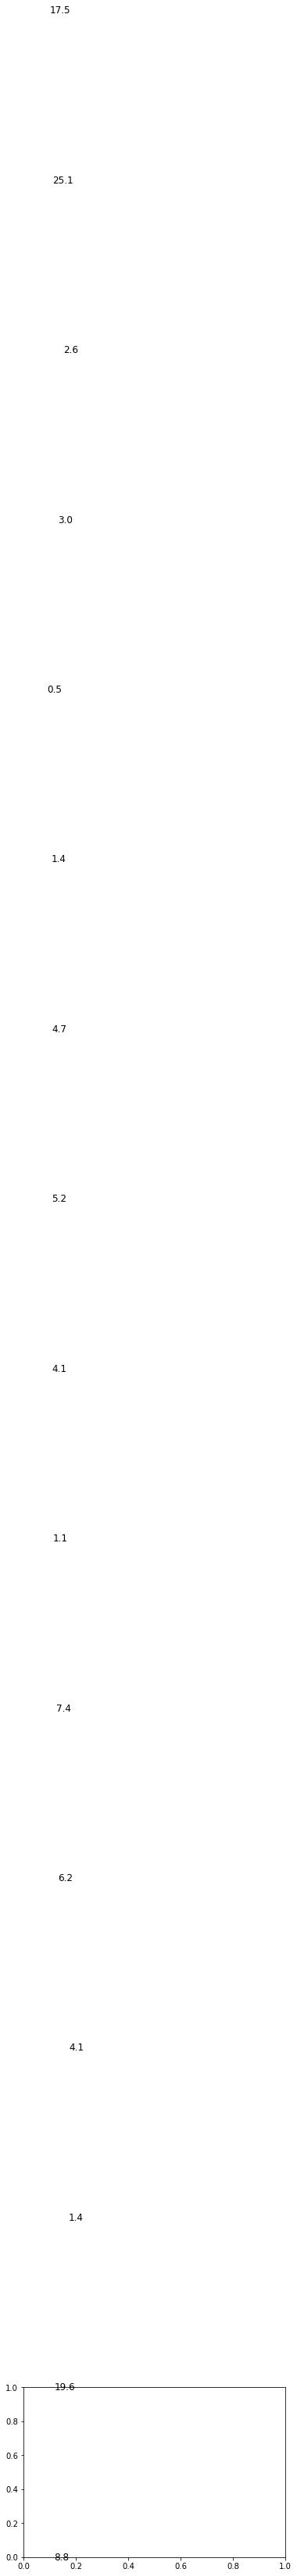

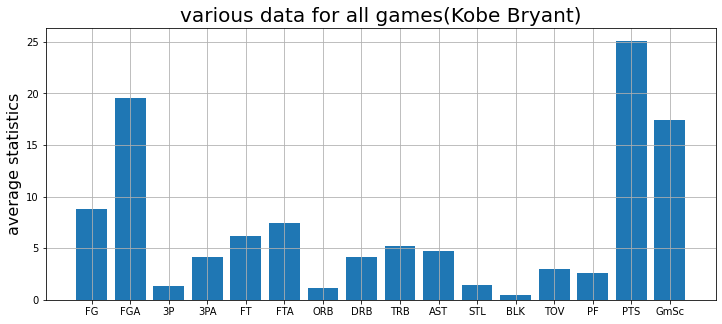

In [161]:
labels = ["FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "GmSc"]
kobeMeans = np.array([kobe[i].mean() for i in labels]) 
for i in range(len(labels)): 
  plt.text(kobeMeans[i]/(total[i]*2), i, kobeMeans[i].round(1), fontsize=12, horizontalalignment="center", verticalalignment="center")
fig = plt.figure(figsize=(12,5))
plt.bar(kobe_avg_stats.keys(),kobe_avg_stats.values())
plt.ylabel('average statistics',fontsize=16)
plt.title('various data for all games(Kobe Bryant)',fontsize=20)
plt.grid()

In [ ]:
#plot出三个球员所有比赛的平均数据 来直观的比较三者的优劣

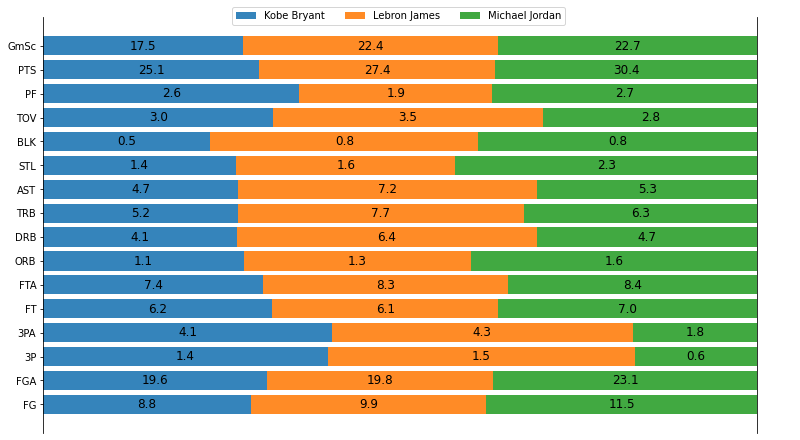

In [21]:
fig = plt.figure(constrained_layout=True, figsize=[11, 6])
ax = fig.add_subplot()

labels = ["FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "GmSc"]
kobeMeans = np.array([kobe[i].mean() for i in labels])   #calculate the average stats
lebronMeans = np.array([lebron[i].mean() for i in labels])
jordanMeans = np.array([jordan[i].mean() for i in labels])
total = kobeMeans + lebronMeans + jordanMeans

ax.barh(y=labels, width=kobeMeans/total, alpha=0.9, label="Kobe Bryant")
ax.barh(y=labels, width=lebronMeans/total, alpha=0.9, label="Lebron James", left=kobeMeans/total)
ax.barh(y=labels, width=jordanMeans/total, alpha=0.9, label="Michael Jordan", left=(kobeMeans + lebronMeans)/total)


for i in range(len(labels)):
    ax.text(x=kobeMeans[i]/(total[i]*2), y=i, s=kobeMeans[i].round(1), fontsize=12, horizontalalignment="center", verticalalignment="center")
    ax.text(x=kobeMeans[i]/total[i] + lebronMeans[i]/(total[i]*2), y=i, s=lebronMeans[i].round(1), fontsize=12, horizontalalignment="center", verticalalignment="center")
    ax.text(x=(kobeMeans[i] + lebronMeans[i])/total[i] + jordanMeans[i]/(total[i]*2), y=i, s=jordanMeans[i].round(1), fontsize=12, horizontalalignment="center", verticalalignment="center")

ax.spines["top"].set_visible(False)  #坐标轴设置 隐藏上下坐标轴
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_position(("data", 1))
ax.set_xticks([])

plt.legend(bbox_to_anchor=(0.245, 0.97), ncol=3)
plt.show()